In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

In [40]:
x, y = load_iris(return_X_y=True, as_frame=True)
x = x.loc[:, ['petal length (cm)', 'petal width (cm)']]

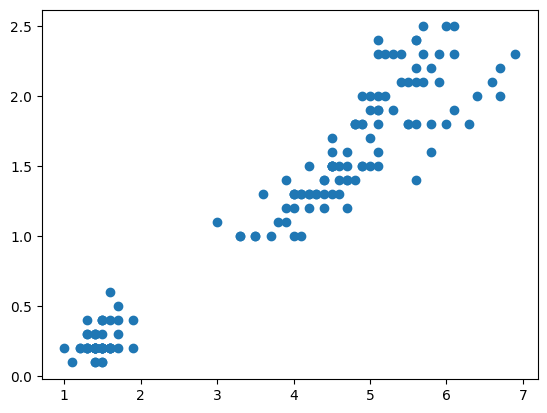

In [41]:
fig, ax = plt.subplots()
ax.scatter(x['petal length (cm)'], x['petal width (cm)'])
plt.show()

In [42]:
kmeans = KMeans(n_clusters=2, n_init='auto').fit(x)
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [43]:
valores_k = []
inercia = []

for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, n_init='auto').fit(x)
    valores_k.append(i)
    inercia.append(kmeans.inertia_)
    print(kmeans.inertia_)

550.8953333333334
86.39021984551395
31.412885668276978
19.483000899685116
13.91690875790876
11.087223662604789
9.328327985739753
8.086991830065362
7.952263077771153
5.574284847718352
5.612
5.163716727716729
4.509664529914531
4.58866492657669


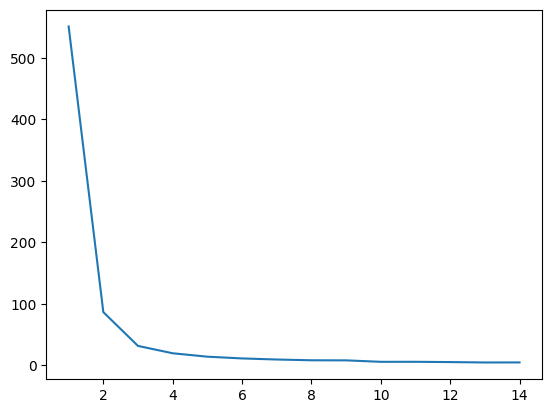

In [44]:
fig, ax = plt.subplots()
ax.plot(valores_k, inercia)
plt.show()

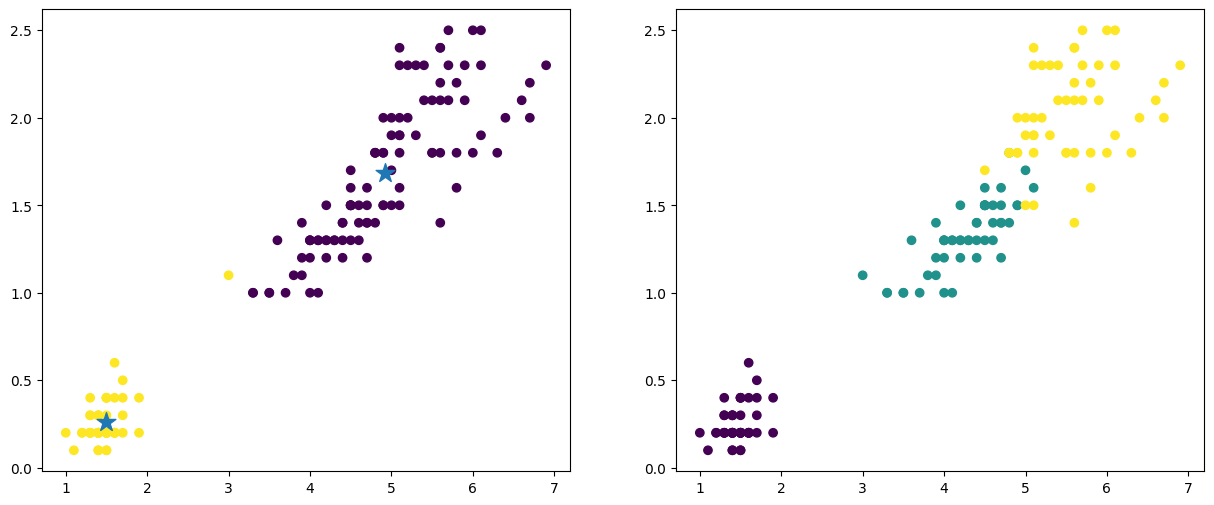

In [45]:
kmeans = KMeans(n_clusters=2, n_init='auto').fit(x)
centroids = kmeans.cluster_centers_
fig, ax = plt.subplots(ncols=2, figsize=(15, 6))
ax[0].scatter(x['petal length (cm)'], x['petal width (cm)'], c=kmeans.labels_)
ax[0].scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200)
ax[1].scatter(x['petal length (cm)'], x['petal width (cm)'], c=y)
plt.show()

In [46]:
from sklearn import metrics

valores_k = []
ARI = []
RI = []

for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, n_init='auto').fit(x)
    valores_k.append(i)
    RI.append(metrics.rand_score(y, kmeans.labels_))
    ARI.append(metrics.adjusted_rand_score(y, kmeans.labels_))

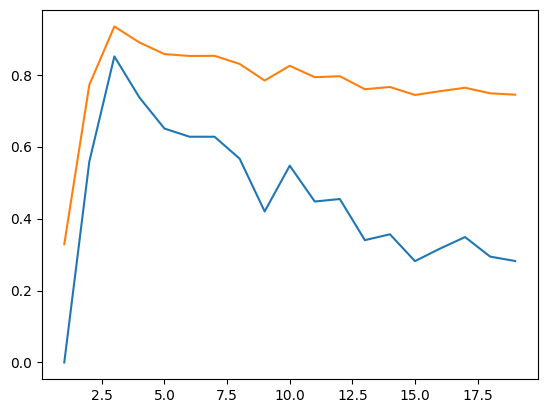

In [47]:
fig, ax = plt.subplots()
ax.plot(valores_k, ARI)
ax.plot(valores_k, RI)
plt.show()

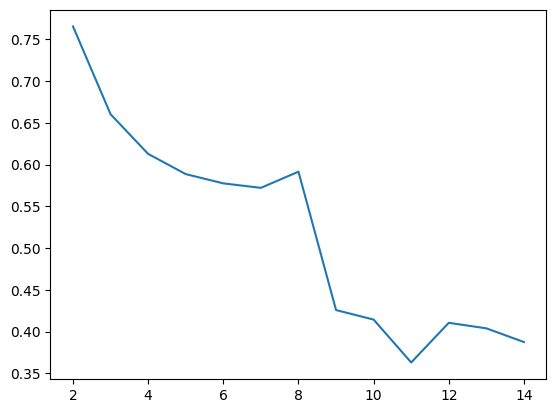

In [59]:
valores_k = []
S = []

for i in range(2, 15):
    kmeans = KMeans(n_clusters=i, n_init='auto').fit(x)
    valores_k.append(i)
    S.append(metrics.silhouette_score(x, kmeans.labels_))

fig, ax = plt.subplots()
ax.plot(valores_k, S)
plt.show()

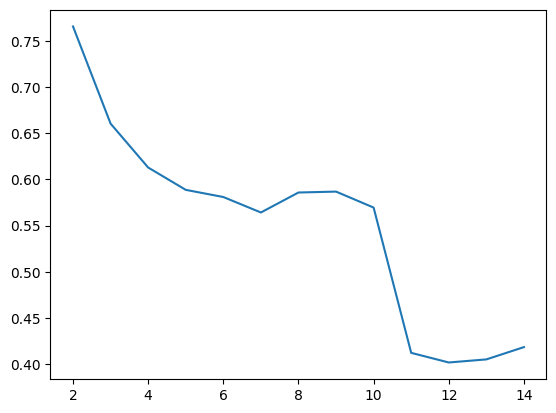